## Conversion Notebook: Mapping from From Data 8X's `datascience` to R

Throughout Data 8X, we have been working a lot with the datascience library, a library created by faculty at UC Berkeley, specifically for this course. While this library is not used outside of this course, all of the ideas and concepts behind the library and the different functions are definitely used when dealing with data science problems in the real world. This notebook serves as an introduction to basic R terminology, data structures and commands. The functions introduced will be analogous to those in Berkeley's `datascience` module, with examples provided for each.

We will cover the following topics in this notebook:
1. Basics of R
    - Importing and Loading Packages
    - Arithmetic and Logical Operators
    - Assigning Variables
2. Dataframes: Storing Tabular Data
    - Creating a Dataframe
    - Accessing Values in Dataframe
    - Manipulating Data
3. Visualizing Data
    - Histograms
    - Line and Scatter Plots
    - Bar Charts
    
For reference:

Datascience documentation: http://data8.org/datascience/index.html

http://data8.org/fa18/python-reference.html

R documentation: https://www.rdocumentation.org/

## 1. Basics of R

R is a command line driven program. This means that the user can enter expressions, create variables and define functions and run them in the R console. In the Jupyter notebook interface, code chunks can be run as individual cells either by clicking on 'Run' in the toolbar above or using the shortcut keys `shift + enter`
<br>

### 1.1 Importing and Loading Packages

In Python, we use the following syntax to install packages:
```python
!pip install datascience
```
And we load them using:
```python
import numpy as np
from datascience import Table
```

In R, we use `install.packages('package_name')` to install new packages from the CRAN repository. For a full list of available packages, refer to https://cran.r-project.org/web/packages/available_packages_by_name.html

It is not necessary to reinstall packages everytime we quit or reload an R session. Once we have a package installed, we can load it using `library('package_name')`.

In [1]:
# Install ggplot2 for data visualization
install.packages("ggplot2")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tarek\AppData\Local\Temp\Rtmpc1fSZY\downloaded_packages


In [2]:
library(ggplot2)

In [3]:
# vectors
a <- c(1,2,3)
b <- c(4,5,6)
ab <- c(a, b)
ab

[1] 1 2 3 4 5 6

In [5]:
# Creating a sequence
seq1 <- seq(1,9)
seq1

[1] 1 2 3 4 5 6 7 8 9

In [7]:
seq2 <- seq(1,8,2)
seq2

[1] 1 3 5 7

In [8]:
# In R, indexing starts at 1. In python, it starts in 0
seq1[1]

[1] 1

## 2. Dataframes: Storing Tabular Data

In Python's `datascience` module, we used `Table` to build our dataframes and used commands such as `select()`, `where()`, `group()`, `column()` etc. In this section, we will go over some basic commands to work with tabular data in R using Dataframes.

In Python's `datascience` module that is used in Data 8, this is how we created tables from scratch by extending an empty table:
```python
t = Table().with_columns([
     'letter', ['a', 'b', 'c', 'z'],
     'count',  [  9,   3,   3,   1],
     'points', [  1,   2,   2,  10],
 ])
```
<br> 
In `pandas` moudule, we create a dataframe as follows:
```python
import pandas as pd
df = pd.DataFrame({'letter': ["a", "b", "c", "z"], 'count': [9, 3, 3, 1], 'points': [1, 2, 2, 10]})```

In R, we can initialize a dataframe using `data.frame()`. For a full list of parameters and options, refer to [this guide](https://www.rdocumentation.org/packages/base/versions/3.5.0/topics/data.frame)

When not specified, the function `data.frame` will coerce all character variables to factors. If you want to keep the strings as character variables, you need to specify `stringsAsFactors = FALSE`.

In [9]:
# example: creating a dataframe in R
t <- data.frame(letter = c('a', 'b', 'c', 'z'),
                count = c(9, 3, 3, 1),
                points = c(1, 2, 2, 10),
                stringsAsFactors = FALSE
               )
t

letter,count,points
a,9,1
b,3,2
c,3,2
z,1,10


More often, we will need to create a dataframe by importing data from a .csv file. In R, we can use `read.csv()` to read data from a csv file. There are a lot of different parameters that we can specify based on the data that we are importing into our environment (related to the header, column names, etc). For a full list of parameters, refer to [this guide](https://www.rdocumentation.org/packages/utils/versions/3.5.0/topics/read.table)

In [12]:
poverty <- read.csv('C:/Users/Tarek/Documents/Data_Science/poverty.csv')
head(poverty)

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,1996,0.20
alb,2002,0.73
alb,2004,0.53
alb,2005,0.44
alb,2008,0.20
alb,2012,0.46


In [13]:
summary(poverty)

      geo           time      extreme_poverty_percent_people_below_125_a_day
 bra    : 28   Min.   :1978   Min.   : 0.00                                 
 cri    : 26   1st Qu.:1995   1st Qu.: 0.45                                 
 arg    : 23   Median :2002   Median : 4.40                                 
 hnd    : 23   Mean   :2000   Mean   :14.29                                 
 col    : 20   3rd Qu.:2007   3rd Qu.:17.40                                 
 ury    : 20   Max.   :2013   Max.   :94.64                                 
 (Other):959                                                                

In [16]:
nrow(poverty)
ncol(poverty)
dim(poverty)
colnames(poverty)

[1] 1099

[1] 3

[1] 1099    3

[1] "geo"                                           
[2] "time"                                          
[3] "extreme_poverty_percent_people_below_125_a_day"

In [22]:
head(poverty$time)
# OR
poverty[1:6, 'time']
# OR
head(poverty[, 2])

[1] 1996 2002 2004 2005 2008 2012

[1] 1996 2002 2004 2005 2008 2012

[1] 1996 2002 2004 2005 2008 2012

In [24]:
poverty[1:3,]

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,1996,0.20
alb,2002,0.73
alb,2004,0.53


### 2.3 Manipulating Data

In R, we can use `data$newcolumn <- datavector` to add a new column to an existing dataframe. On the right side of the arrow, we have the data vector we want to add to the dataframe and we can add this data by accessing/creating a new column the `$` notation.

In [25]:
# example: Adding a new column
t$vowel <- c('yes', 'no', 'no', 'no')
t

letter,count,points,vowel
a,9,1,yes
b,3,2,no
c,3,2,no
z,1,10,no


We can also add an existing column to the dataframe, which might be manipulated and added as a new column. This will manipulate the column within the existing dataframe that we have.

In [26]:
# Example: Adding twice the count to the dataframe
t$double <- t$count * 2
t

letter,count,points,vowel,double
a,9,1,yes,18
b,3,2,no,6
c,3,2,no,6
z,1,10,no,2


**Filtering Rows Conditionally**

In R, we use the following syntax to subset rows: `df[df$colname <logical operator> value, ]` (Note the comma at the end!). The following examples will provide different ways of filtering the dataframe.

In [27]:
# rows where points = 2
t[t$points == 2, ]

,letter,count,points,vowel,double
2,b,3,2,no,6
3,c,3,2,no,6


In [28]:
# rows where count < 8
t[t['count'] <= 8, ] # we can also use df['colname'] instead of df$colname

,letter,count,points,vowel,double
2,b,3,2,no,6
3,c,3,2,no,6
4,z,1,10,no,2


In [29]:
# multiple conditions: points < 2 and vowel = 'yes'
t[t$points < 2 & t['vowel'] == 'yes', ]

letter,count,points,vowel,double
a,9,1,yes,18


**Renaming Columns**

In R, we can use the following to rename columns: `colnames(df)[colnames(df) == oldcolname] <- newcolname`. This selects the required column by filtering from `colnames(df)` and then assigns the new name to that column. Note that the Python `relabeled()` function creates a new Table, while the R method to rename mutates the current table.

In [30]:
# example: renaming double to twice
colnames(t)[colnames(t) == 'double'] <- 'twice'
t

letter,count,points,vowel,twice
a,9,1,yes,18
b,3,2,no,6
c,3,2,no,6
z,1,10,no,2


**Sorting Dataframe by Column**

In R, we can use `order()` in the subset notation: `df[order(df$colname), ]`.

In [31]:
# sort by count
t[order(t$count), ]

,letter,count,points,vowel,twice
4,z,1,10,no,2
2,b,3,2,no,6
3,c,3,2,no,6
1,a,9,1,yes,18


In [32]:
# sort by descending order of count
t[order(-t$count), ]

letter,count,points,vowel,twice
a,9,1,yes,18
b,3,2,no,6
c,3,2,no,6
z,1,10,no,2


**Grouping and Aggregating**

In R, we can use `aggregate()` to group and aggregate values in our dataframe

In [33]:
# grouping by count and summing points
aggregate(points ~ count, t, sum)

count,points
1,10
3,4
9,1


**Pivot Table**

In R, one simple way of building a pivot table is to use the `table()` function

In [37]:
pop <- read.csv('C:/Users/Tarek/Documents/Data_Science/population.csv')
head(pop)

geo,time,population_total
afg,1800,3280000
afg,1801,3280000
afg,1802,3280000
afg,1803,3280000
afg,1804,3280000
afg,1805,3280000


In [46]:
# Group by time to find the total world population each year 
t <- aggregate(population_total ~ time, pop, sum)
# Get the total population between 1950 and 2015 for example
t_1950_2015 <- t[t['time'] <= 2015 & t['time'] >= 1950,]
head(t_1950_2015)

,time,population_total
151,1950,2532392455
152,1951,2579907584
153,1952,2626640793
154,1953,2673247873
155,1954,2720278371
156,1955,2768174803


In [48]:
length(table(pop$geo))

[1] 197

In [51]:
nrow(pop)
dim(pop)

[1] 59297

[1] 59297     3

## 3. Visualizing Data

### 3.1 Histograms

In R, we can simply use the `hist()` function to create a histogram. In this example, we will be using data from `baby.csv`. Recall that the baby data set contains data on a random sample of 1,174 mothers and their newborn babies. The column `birthwt` contains the birth weight of the baby, in ounces; `gest_days` is the number of gestational days, that is, the number of days the baby was in the womb. There is also data on maternal age, maternal height, maternal pregnancy weight, and whether or not the mother was a smoker.

In [243]:
baby <- read.csv('C:/Users/Tarek/Documents/Data_Science/baby.csv')
summary(baby)

  Birth.Weight   Gestational.Days  Maternal.Age   Maternal.Height
 Min.   : 55.0   Min.   :148.0    Min.   :15.00   Min.   :53.00  
 1st Qu.:108.0   1st Qu.:272.0    1st Qu.:23.00   1st Qu.:62.00  
 Median :120.0   Median :280.0    Median :26.00   Median :64.00  
 Mean   :119.5   Mean   :279.1    Mean   :27.23   Mean   :64.05  
 3rd Qu.:131.0   3rd Qu.:288.0    3rd Qu.:31.00   3rd Qu.:66.00  
 Max.   :176.0   Max.   :353.0    Max.   :45.00   Max.   :72.00  
 Maternal.Pregnancy.Weight Maternal.Smoker
 Min.   : 87.0             False:715      
 1st Qu.:114.2             True :459      
 Median :125.0                            
 Mean   :128.5                            
 3rd Qu.:139.0                            
 Max.   :250.0                            

In [56]:
head(baby)

Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False


In [202]:
round((table(baby$Maternal.Smoker)[1] / sum(table(baby$Maternal.Smoker)))*100,2)

False 
 60.9

In [212]:
mean(baby$Birth.Weight)
median((baby$Birth.Weight))

[1] 119.4625

[1] 120

In [209]:
# Compare birth weights of babies whose mothers smoke to those who don't!
aggregate(Birth.Weight ~ Maternal.Smoker, baby, mean)

Maternal.Smoker,Birth.Weight
False,123.0853
True,113.8192


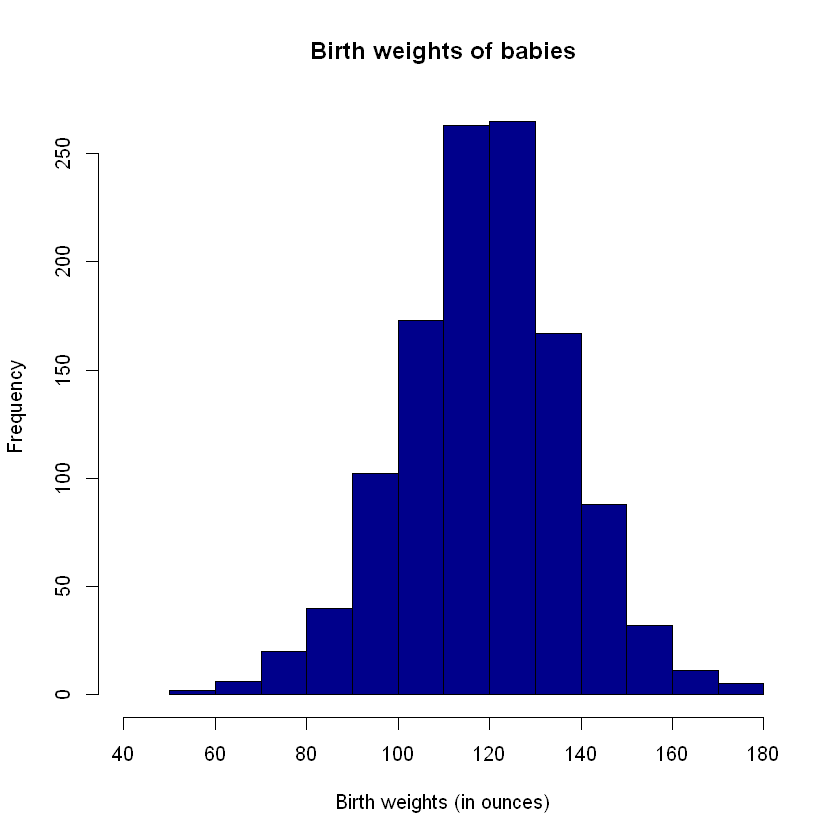

In [58]:
# plotting a histogram of birth weights using base R
hist(baby$Birth.Weight, 
     col=c("darkblue"), # histogram color
     main = "Birth weights of babies",# plot titile
     xlab = "Birth weights (in ounces)", # x axis lable
     xlim = c(40, 180)) # x axis range

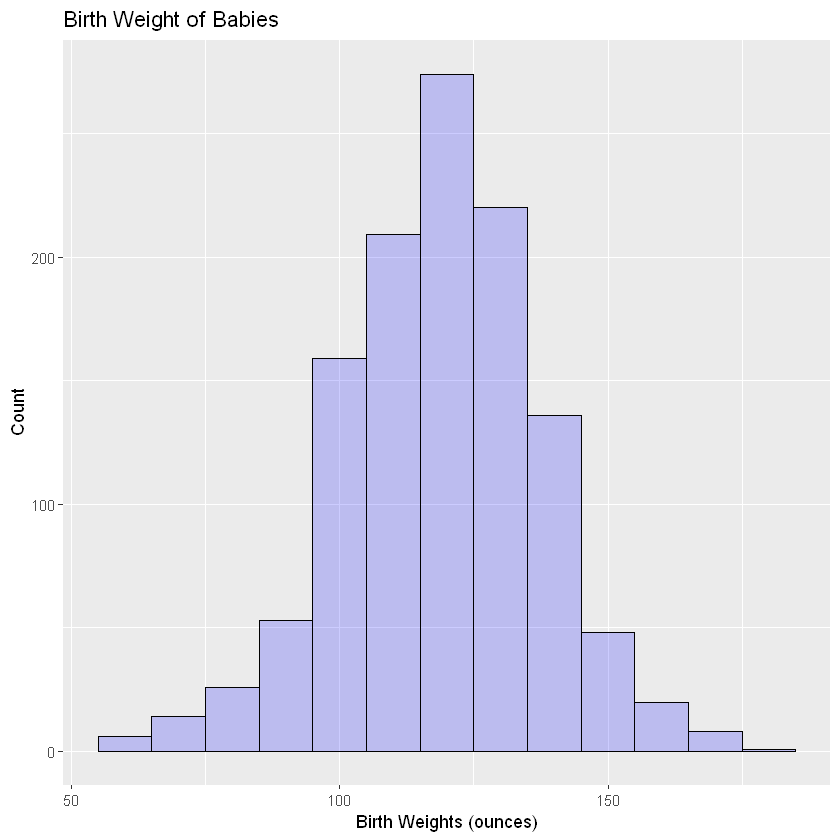

In [72]:
# Using ggplot2
qplot(baby$Birth.Weight,
      main = 'Birth Weight of Babies',
      xlab = 'Birth Weights (ounces)',
      ylab = 'Count',
      binwidth = 10,
      fill = I('blue'),
      col = I('black'),
      alpha = I(0.2)
      )

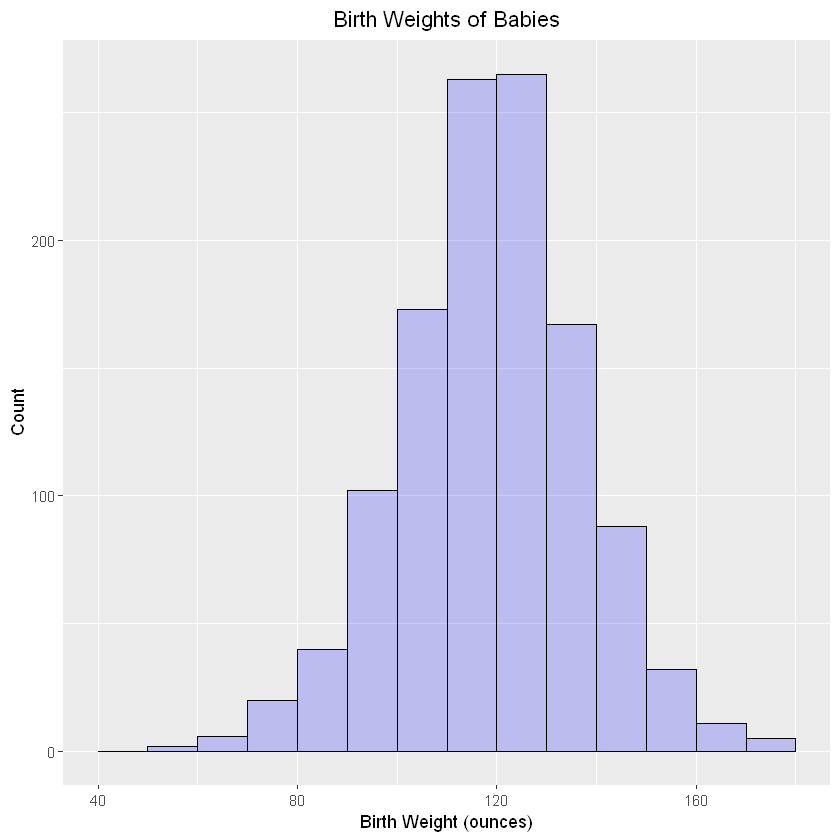

In [88]:
# OR
ggplot(data = baby, aes(x = baby$Birth.Weight)) + 
    geom_histogram(breaks=seq(40, 180, by=10), 
                 col="black", 
                 fill="blue", 
                 alpha = .2) + 
    labs(title="Birth Weights of Babies", x="Birth Weight (ounces)", y="Count") +
    theme(plot.title = element_text(hjust = 0.5)) + 
    scale_fill_gradient("Count", low="red", high="green")

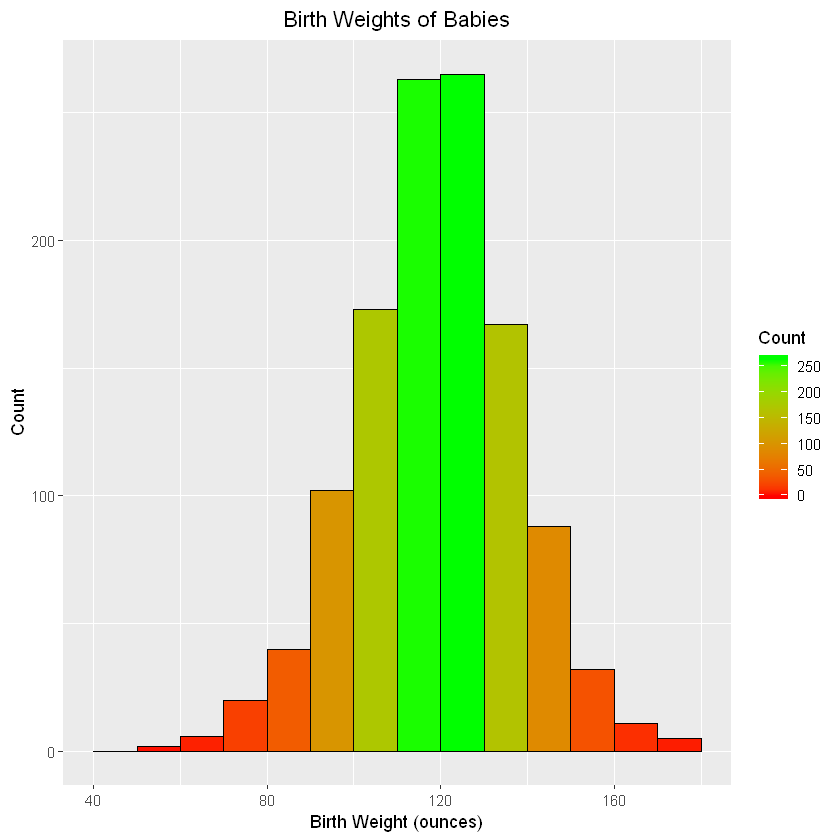

In [97]:
ggplot(data = baby, aes(x = baby$Birth.Weight)) + 
    geom_histogram(breaks=seq(40, 180, by=10), 
                 col="black", 
                 aes(fill=..count..)) + 
    scale_fill_gradient("Count", low="red", high="green") + 
    labs(title="Birth Weights of Babies", x="Birth Weight (ounces)", y="Count") +
    theme(plot.title = element_text(hjust = 0.5))

### 3.2 Line and Scatter Plots

We can use the `plot()` function in R to plot two vectors X and Y. The first argument is the X values and the second argument is the Y values. We can specify the `type` parameter and set it to `'l'` for line plots, `'p'` for scatter plots and `'b'` for both. For a full list of parameters, refer to [this guide](https://www.rdocumentation.org/packages/graphics/versions/3.5.0/topics/plot)

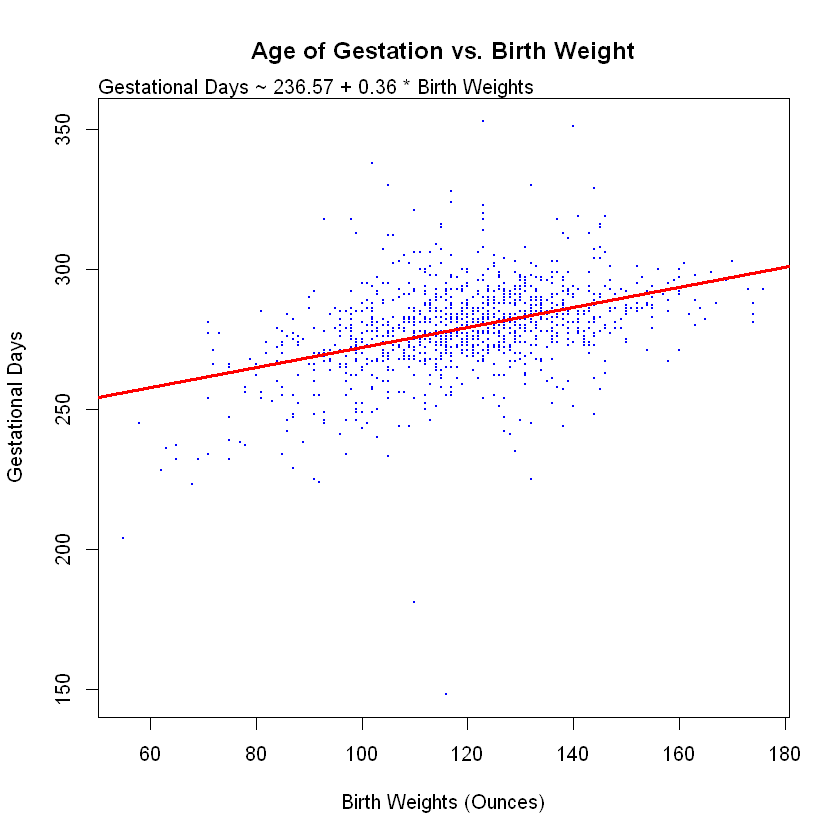

In [188]:
# Simple linear regression model 
reg <- lm(Gestational.Days ~ Birth.Weight, data = baby)
coeff <- coefficients(reg)

# Scatter plot using Base R
plot(baby$Birth.Weigh, baby$Gestational.Days, 
     main="Age of Gestation vs. Birth Weight",
     xlab = "Birth Weights (Ounces)",
     ylab = "Gestational Days",
     col = "blue",
     pch = 16,
     cex = 0.2)
abline(reg, col="red", lwd = 3)
m1 = summary(reg)
mtext(paste0("Gestational Days ~ ",round(m1$coefficients[1],2)," + ", 
                   round(m1$coefficients[2],2)," * Birth Weights"), adj = 0)


In [116]:
mean(baby[,'Birth.Weight'])
mean(baby[,'Gestational.Days'])

[1] 119.4625

[1] 279.1014

In [126]:
coeff

(Intercept) Birth.Weight 
 236.5735041    0.3559933

In [127]:
reg


Call:
lm(formula = Gestational.Days ~ Birth.Weight, data = baby)

Coefficients:
 (Intercept)  Birth.Weight  
     236.574         0.356  


In [141]:
summary(reg)


Call:
lm(formula = Gestational.Days ~ Birth.Weight, data = baby)

Residuals:
     Min       1Q   Median       3Q      Max 
-129.869   -6.649    0.063    7.467   72.639 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  236.5735     2.8161   84.01   <2e-16 ***
Birth.Weight   0.3560     0.0233   15.28   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.63 on 1172 degrees of freedom
Multiple R-squared:  0.1661,	Adjusted R-squared:  0.1654 
F-statistic: 233.4 on 1 and 1172 DF,  p-value: < 2.2e-16


In [142]:
m1 = summary(reg)
mtext(paste0("dist ~ ",round(m1$coefficients[1],2)," + ", 
                   round(m1$coefficients[2],2),"x"),
      adj = 1)

ERROR: Error in mtext(paste0("dist ~ ", round(m1$coefficients[1], 2), " + ", : plot.new has not been called yet


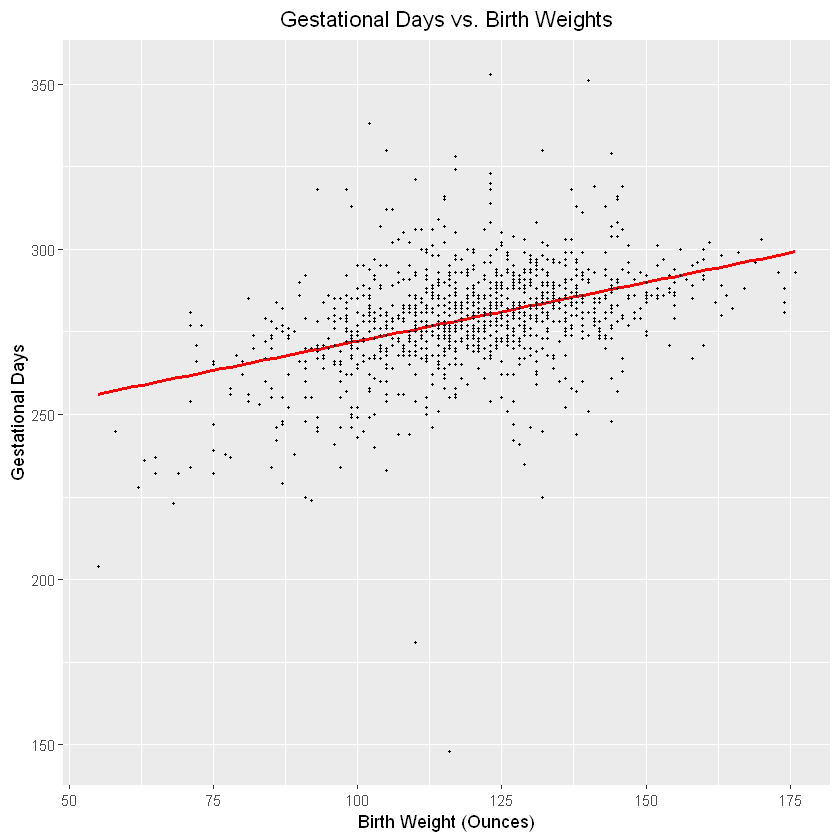

In [164]:
# Using the ggplot2 Package
lm_eqn <- function(df){
    m <- lm(y ~ x, df);
    eq <- substitute(italic(y) == a + b %.% italic(x)*","~~italic(r)^2~"="~r2, 
         list(a = format(unname(coef(m)[1]), digits = 2),
              b = format(unname(coef(m)[2]), digits = 2),
             r2 = format(summary(m)$r.squared, digits = 3)))
    as.character(as.expression(eq));
}

p <- ggplot(data = baby, aes(x=Birth.Weight, y=Gestational.Days)) + 
        geom_smooth(method = "lm", se=FALSE, color="red", formula = y ~ x) +
        geom_point(cex=0.5) +
        labs(title = "Gestational Days vs. Birth Weights", x = "Birth Weight (Ounces)", y = "Gestational Days") +
        theme(plot.title = element_text(hjust = 0.5)) 
p
# p1 <- p + geom_text(x = 100, y = 200, label = lm_eqn(baby), parse = TRUE)

In [165]:
install.packages("ggpmisc")

also installing the dependencies 'gridExtra', 'polynom', 'splus2R'



package 'gridExtra' successfully unpacked and MD5 sums checked
package 'polynom' successfully unpacked and MD5 sums checked
package 'splus2R' successfully unpacked and MD5 sums checked
package 'ggpmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tarek\AppData\Local\Temp\Rtmpc1fSZY\downloaded_packages


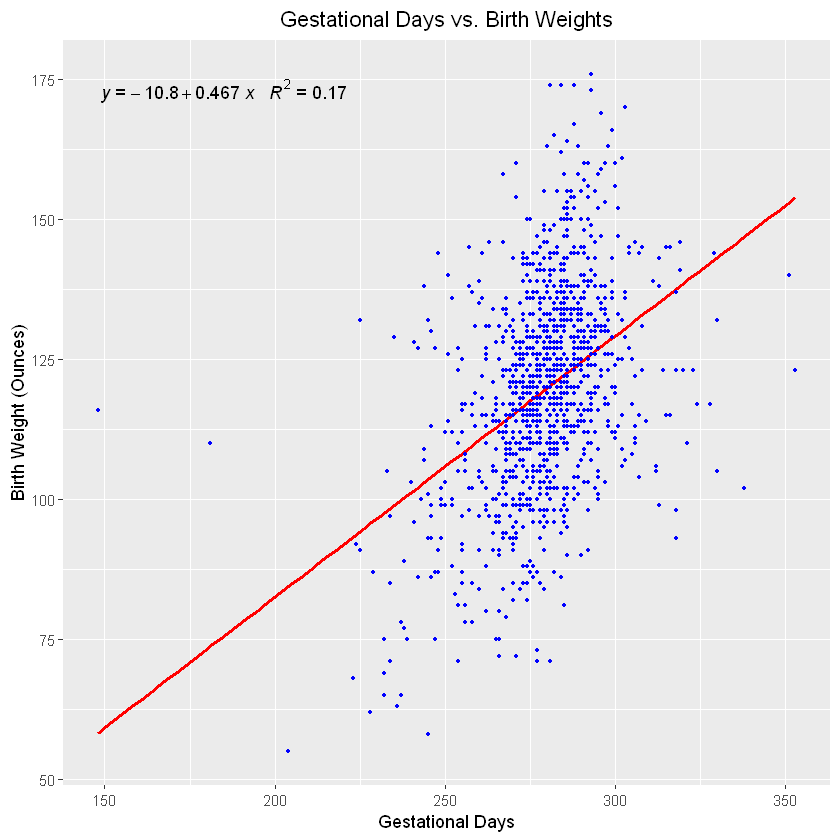

In [187]:
library(ggpmisc)
m <- lm(Gestational.Days ~ Birth.Weight, data = baby)   
my_formula <- baby$Birth.Weight ~ baby$Gestational.Days

p <- ggplot(data = baby, aes(x = Gestational.Days, y = Birth.Weight)) +
           geom_smooth(method = "lm", se=FALSE, color="red", formula = my.formula) +
           stat_poly_eq(formula = my.formula, 
                        aes(label = paste(..eq.label.., ..rr.label.., sep = "~~~")), 
                        parse = TRUE) +    
           geom_point(cex = 0.8, col="blue") +
           labs(title = "Gestational Days vs. Birth Weights", x = "Gestational Days", y = "Birth Weight (Ounces)") +
           theme(plot.title = element_text(hjust = 0.5))
             
p

In [168]:
m <- lm(Gestational.Days ~ Birth.Weight, data = baby)
coefficients(m)

(Intercept) Birth.Weight 
 236.5735041    0.3559933

In [169]:
summary(m)


Call:
lm(formula = Gestational.Days ~ Birth.Weight, data = baby)

Residuals:
     Min       1Q   Median       3Q      Max 
-129.869   -6.649    0.063    7.467   72.639 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  236.5735     2.8161   84.01   <2e-16 ***
Birth.Weight   0.3560     0.0233   15.28   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.63 on 1172 degrees of freedom
Multiple R-squared:  0.1661,	Adjusted R-squared:  0.1654 
F-statistic: 233.4 on 1 and 1172 DF,  p-value: < 2.2e-16


### 3.3 Bar Charts

We can plot categorical variables using a bar chart using the `barplot()` function in R. 

In [244]:
bwt_avg <- mean(baby$Birth.Weight)
# This is just for illustration
baby$category <- cut(baby$Birth.Weight, 
                   breaks=c(-Inf, bwt_avg - 40, bwt_avg - 20, bwt_avg + 20, bwt_avg + 40, Inf), 
                   labels=c("Very Low","Low", "Normal", "Heavy","Very Heavy"))
head(baby)

Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker,category
120,284,27,62,100,False,Normal
113,282,33,64,135,False,Normal
128,279,28,64,115,True,Normal
108,282,23,67,125,True,Normal
136,286,25,62,93,False,Normal
138,244,33,62,178,False,Normal


In [222]:
nrow(baby[baby$category == 'Heavy',])

[1] 124

In [228]:
# Baby Weights category grouped if a mother was a smoker or not during pregnancy
category_by_smoking <- table(baby$Maternal.Smoker, baby$category)
category_by_smoking

       
        Very Low Low Normal Heavy Very Heavy
  False       11  43    558    86         17
  True        15  84    318    38          4

In [259]:
baby$Smoker = ifelse(baby$Maternal.Smoker == "True", "Yes", "No")
head(baby)

Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker,category,Smoker
120,284,27,62,100,False,Normal,No
113,282,33,64,135,False,Normal,No
128,279,28,64,115,True,Normal,Yes
108,282,23,67,125,True,Normal,Yes
136,286,25,62,93,False,Normal,No
138,244,33,62,178,False,Normal,No


In [257]:
is.logical(baby$Maternal.Smoker)

[1] FALSE

In [261]:
# Baby Weights category grouped if a mother was a smoker or not during pregnancy
category_by_smoking <- table(baby$Smoker, baby$category)
category_by_smoking

     
      Very Low Low Normal Heavy Very Heavy
  No        11  43    558    86         17
  Yes       15  84    318    38          4

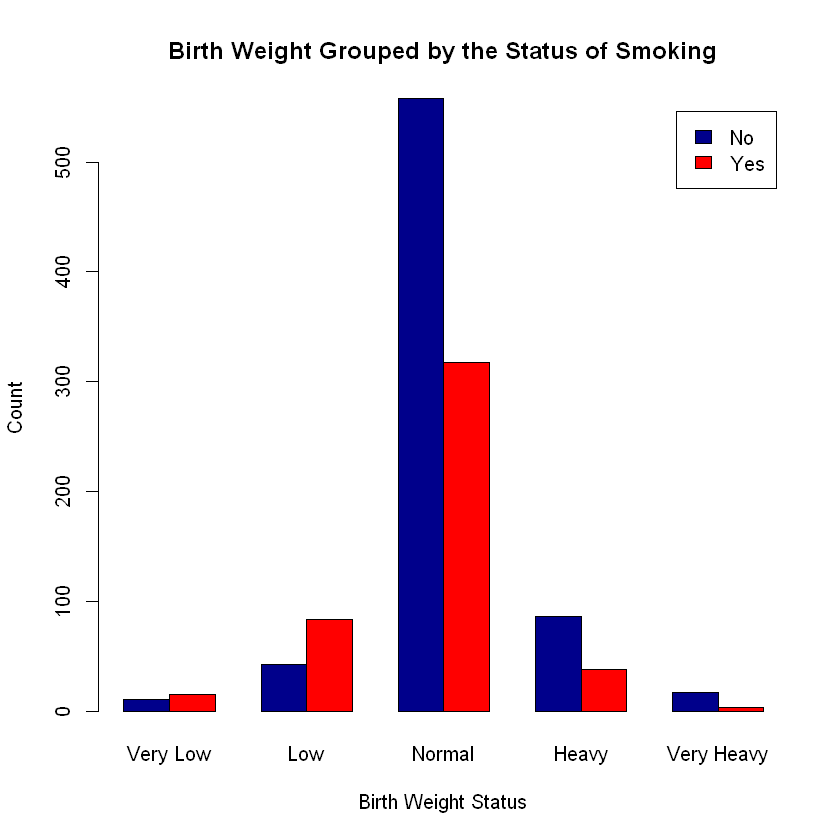

In [264]:
# creating a bar chart
barplot(category_by_smoking, 
        main="Birth Weight Grouped by the Status of Smoking", # Title of the plot
        xlab="Birth Weight Status", # x axis label
        ylab="Count",
        col=c("darkblue","red"), # specify color
        legend = rownames(category_by_smoking), # legend
        beside=TRUE # plot bars for male and female side by side
       )

### Reading `R` Documentation
There are many more functions and methods you can call with `R` to do more cool things and expanding on what we went through in this notebook. One way to learn more about this is by looking through the `R` documentation. The documentation has all the different functions associated with `R`, and descriptions about what they do, how you use them, and some examples. 

Some tips for reading through the documentation:
* For various functions there are LOTS of different parameters that you can call, usually there are only a few that are important (usually related to the data you are working with and specifying how to run the functions). There are some parameters that are optional and you do not have to specify (automatically R will use default settings for these functions). 

### Further Reading
Here is a list of useful resources for R:
* [R Documentation](https://www.rdocumentation.org/)
* [R for Data Science Online Textbook](http://r4ds.had.co.nz/)
* [Quick-R (Short R Tutorials)](https://www.statmethods.net/)
* [Professor Gaston Sanchez's Tutorials](http://www.gastonsanchez.com/)

In [273]:
Monthly_Hours <- data.frame(Month = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'),
                 Hours = c(126, 142, 179, 132, 179, 112, 172, 136, 100, 0, 0, 0))
Non_Zero_Monthly_Hours <- Monthly_Hours[Monthly_Hours$Hours != 0,]
Avg_Monthly_Salary <- mean(Non_Zero_Monthly_Hours$Hours) * 11 * (1 - 7.5/100)
round(Avg_Monthly_Salary) * 1500

[1] 2167500